# Workshop 4: Pandas und Numpy

* Schwierigkeit: einfach
* Prüfungsrelevant: nein
* Zeitaufwand: 30min

Pandas bietet einige praktische Methoden, um mit SQL-Datenbanken zu arbeiten. Vieles, was wir in diesem Kurs von Hand gemacht haben, wird automatisisert.

In [1]:
# Hilfsfunktionen laden und ...
from util.sqlite_util import *

# ... Test-Datenbank öffnen
path = get_connection_path("chinook.sqlite")
connection = create_connection(path)

Connection to SQLite DB 2.6.0 (./data/chinook.sqlite) successful


## Pandas

In [2]:
connection.close()
# Wechseln wir nochmals zur Chinook Datenbank...
path = get_connection_path("chinook.sqlite")
connection = create_connection(path)

Connection to SQLite DB 2.6.0 (./data/chinook.sqlite) successful


In [3]:
import pandas as pd
stmt = """
SELECT ar.name, al.title, t.name, t.composer, t.milliseconds, t.bytes, t.unitPrice FROM 
  tracks t
    INNER JOIN albums al USING(albumid)
    INNER JOIN artists ar USING(artistid)
;
"""
df = pd.read_sql_query(stmt, connection)

# Verify that result of SQL query is stored in the dataframe
print(df.head())


    Name                                  Title  \
0  AC/DC  For Those About To Rock We Salute You   
1  AC/DC  For Those About To Rock We Salute You   
2  AC/DC  For Those About To Rock We Salute You   
3  AC/DC  For Those About To Rock We Salute You   
4  AC/DC  For Those About To Rock We Salute You   

                                      Name  \
0  For Those About To Rock (We Salute You)   
1                    Put The Finger On You   
2                          Let's Get It Up   
3                         Inject The Venom   
4                               Snowballed   

                                    Composer  Milliseconds     Bytes  \
0  Angus Young, Malcolm Young, Brian Johnson        343719  11170334   
1  Angus Young, Malcolm Young, Brian Johnson        205662   6713451   
2  Angus Young, Malcolm Young, Brian Johnson        233926   7636561   
3  Angus Young, Malcolm Young, Brian Johnson        210834   6852860   
4  Angus Young, Malcolm Young, Brian Johnson        2031

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          3503 non-null   object 
 1   Title         3503 non-null   object 
 2   Name          3503 non-null   object 
 3   Composer      2525 non-null   object 
 4   Milliseconds  3503 non-null   int64  
 5   Bytes         3503 non-null   int64  
 6   UnitPrice     3503 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 191.7+ KB
None


In [5]:
print(df.describe())

       Milliseconds         Bytes    UnitPrice
count  3.503000e+03  3.503000e+03  3503.000000
mean   3.935992e+05  3.351021e+07     1.050805
std    5.350054e+05  1.053925e+08     0.239006
min    1.071000e+03  3.874700e+04     0.990000
25%    2.072810e+05  6.342566e+06     0.990000
50%    2.556340e+05  8.107896e+06     0.990000
75%    3.216450e+05  1.026679e+07     0.990000
max    5.286953e+06  1.059546e+09     1.990000


<AxesSubplot:>

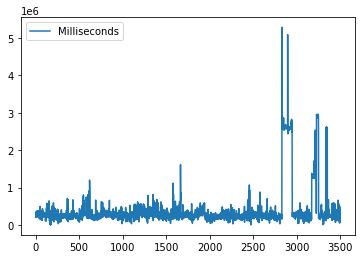

In [6]:
df.plot.line(y=["Milliseconds"])

In [ ]:
# Aufgabe 4.1: Wähle eine oder mehrere Queries auf ws01 und implementiere sie mit Pandas.

## NumPy

Mit [Pandas.DataFrame.to_numpy()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html) kann ein Pandas Dataframe einfach in ein Numpy Array umgewandelt werden.

In [9]:
songs = df.to_numpy()
print (songs)

[['AC/DC' 'For Those About To Rock We Salute You'
  'For Those About To Rock (We Salute You)' ... 343719 11170334 0.99]
 ['AC/DC' 'For Those About To Rock We Salute You' 'Put The Finger On You'
  ... 205662 6713451 0.99]
 ['AC/DC' 'For Those About To Rock We Salute You' "Let's Get It Up" ...
  233926 7636561 0.99]
 ...
 ['C. Monteverdi, Nigel Rogers - Chiaroscuro; London Baroque; London Cornett & Sackbu'
  "Monteverdi: L'Orfeo" "L'orfeo, Act 3, Sinfonia (Orchestra)" ... 66639
  1189062 0.99]
 ['Nash Ensemble' 'Mozart: Chamber Music'
  'Quintet for Horn, Violin, 2 Violas, and Cello in E Flat Major, K. 407/386c: III. Allegro'
  ... 221331 3665114 0.99]
 ['Philip Glass Ensemble'
  'Koyaanisqatsi (Soundtrack from the Motion Picture)' 'Koyaanisqatsi'
  ... 206005 3305164 0.99]]


In [11]:
print ("Album title: %s" % songs[0][1])

Album title: For Those About To Rock We Salute You


In [ ]:
# Aufgabe 4.2: Experimentiere mit Numpy-Arrays (z.B drucke alle Album-Titel im Array)

# Lösungen
Es gibt keine Lösungen, da die Aufgaben offen gestellt sind. Bei Bedarf bitte nachfragen.